In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import scipy.interpolate as inter
import plotly.express as px
from sklearn import preprocessing as skprep
import numba
import timeit
import math
from mnk import MNK
import itertools
from pprint import pprint

In [5]:
df = pd.read_csv("DataSet1_3.csv", sep=',')
df["Date"] = df["Date"].astype("datetime64")
df = df.drop(columns=["Name"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3019 non-null   datetime64[ns]
 1   Open    3019 non-null   float64       
 2   High    3019 non-null   float64       
 3   Low     3019 non-null   float64       
 4   Close   3019 non-null   float64       
 5   Volume  3019 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 141.6 KB


In [6]:
df

,Date,Open,High,Low,Close,Volume
0,2006-01-03,211.47,218.05,209.32,217.83,13137450
1,2006-01-04,222.17,224.70,220.09,222.84,15292353
2,2006-01-05,223.22,226.00,220.97,225.85,10815661
3,2006-01-06,228.66,235.49,226.85,233.06,17759521
4,2006-01-09,233.44,236.94,230.70,233.68,12795837
...,...,...,...,...,...,...
3014,2017-12-22,1070.00,1071.72,1067.64,1068.86,889446
3015,2017-12-26,1068.64,1068.86,1058.64,1065.85,918767
3016,2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203
3017,2017-12-28,1062.25,1064.84,1053.38,1055.95,994249


In [7]:
couples = list(itertools.combinations(df.columns, 2))
couples

[('Date', 'Open'),
 ('Date', 'High'),
 ('Date', 'Low'),
 ('Date', 'Close'),
 ('Date', 'Volume'),
 ('Open', 'High'),
 ('Open', 'Low'),
 ('Open', 'Close'),
 ('Open', 'Volume'),
 ('High', 'Low'),
 ('High', 'Close'),
 ('High', 'Volume'),
 ('Low', 'Close'),
 ('Low', 'Volume'),
 ('Close', 'Volume')]

In [8]:
funcs = [
    lambda x: x ** 0,
    lambda x: x,
    lambda x: x ** 2,
]

mnks = [MNK(df[couple[0]].values.astype("float64"), df[couple[1]].values.astype("float64"), funcs) for couple in
        couples]

array([ 1.28712752e+04, -2.08769603e-14,  8.60957053e-33])


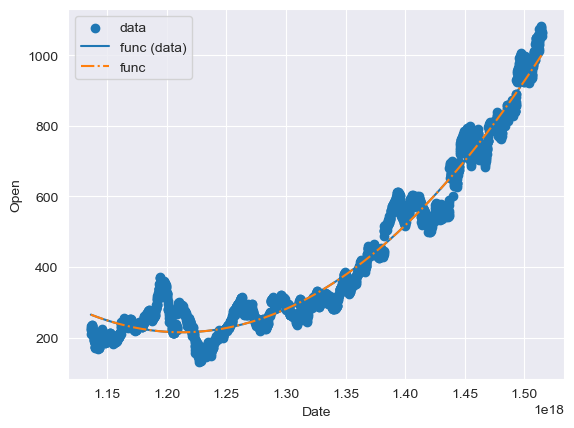

array([ 1.29531052e+04, -2.10056119e-14,  8.66176867e-33])


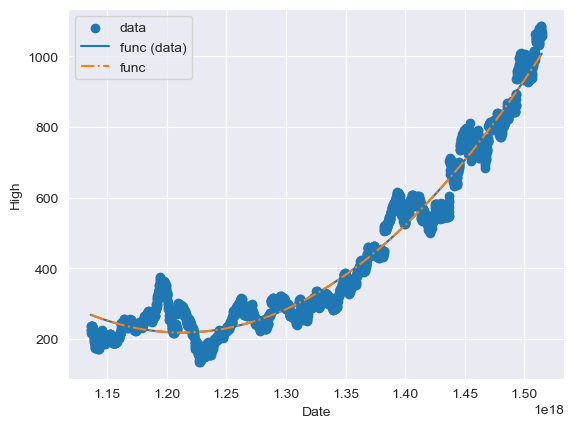

array([ 1.27739693e+04, -2.07243795e-14,  8.54794396e-33])


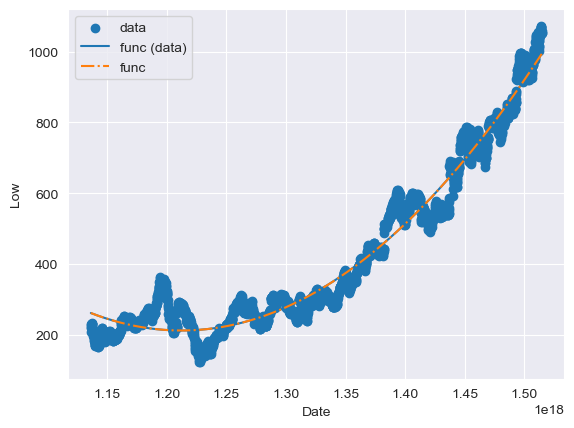

array([ 1.28679335e+04, -2.08726881e-14,  8.60816971e-33])


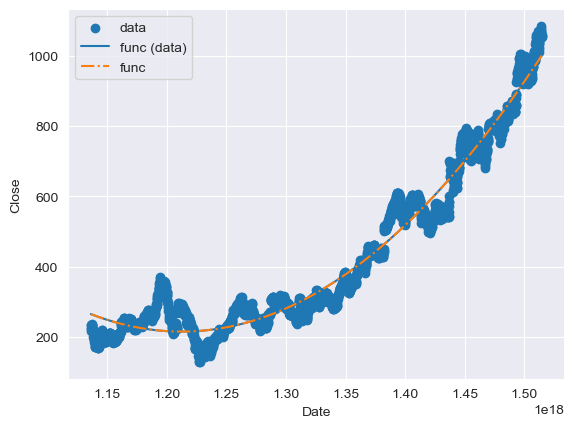

array([ 1.68078526e+08, -2.33161873e-10,  8.17052865e-29])


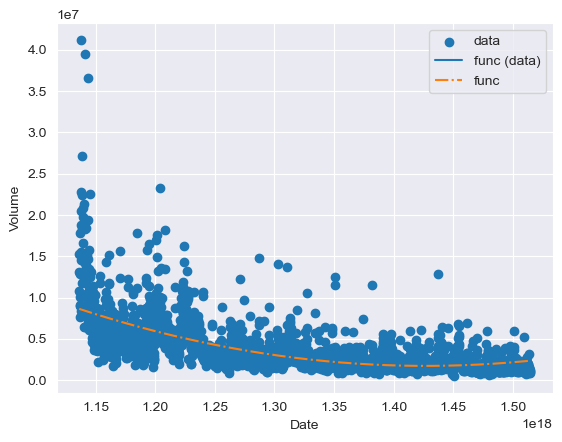

array([1.75243376e+00, 1.00381089e+00, 1.04753708e-06])


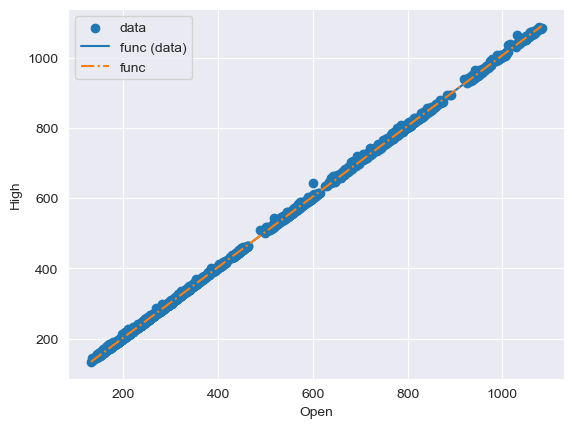

array([-1.27438443e+00,  9.92977050e-01,  8.82543255e-07])


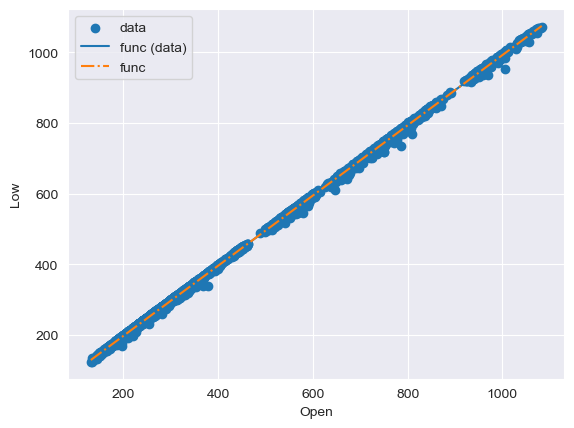

array([1.98155116e-01, 9.98458518e-01, 1.27561939e-06])


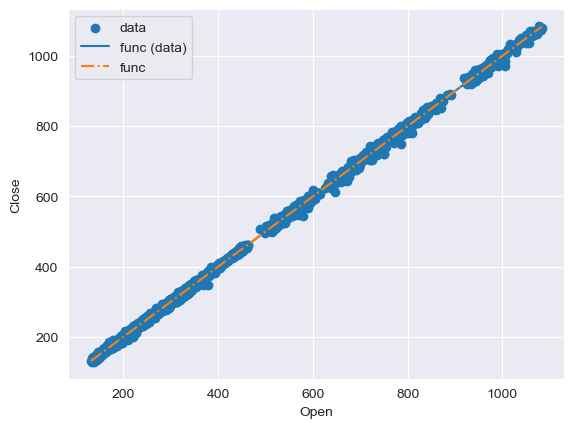

array([ 9.39489782e+06, -2.21051675e+04,  1.51433514e+01])


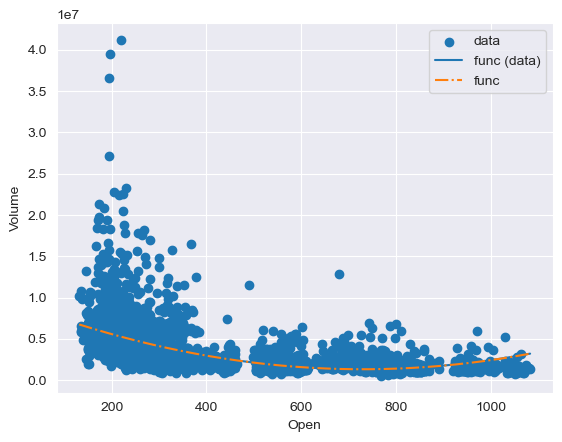

array([-2.97132445e+00,  9.89159399e-01, -2.16821481e-07])


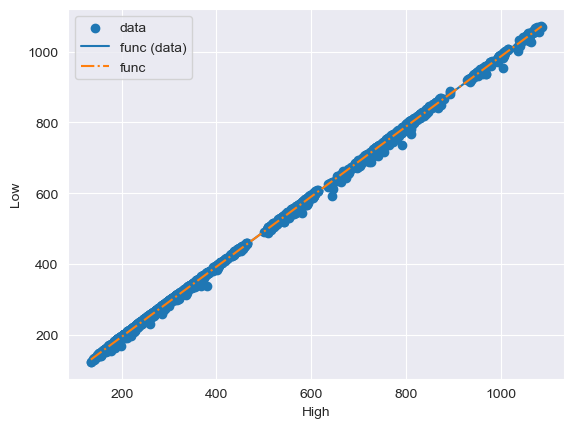

array([-1.55638160e+00,  9.94703939e-01,  2.13247789e-07])


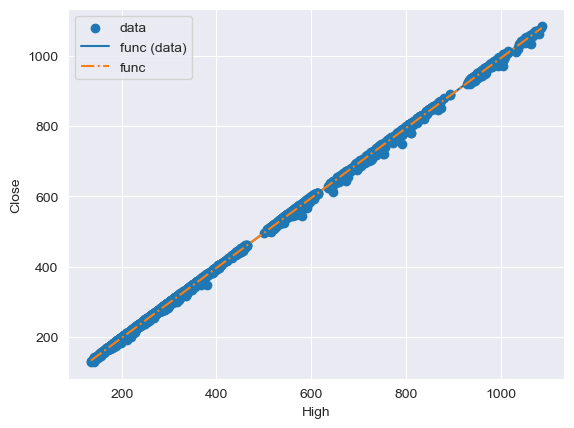

array([ 9.38285097e+06, -2.18563921e+04,  1.48512712e+01])


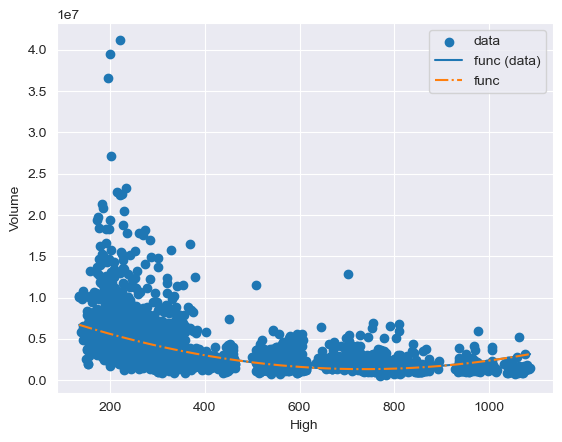

array([1.47744226e+00, 1.00553754e+00, 3.72877919e-07])


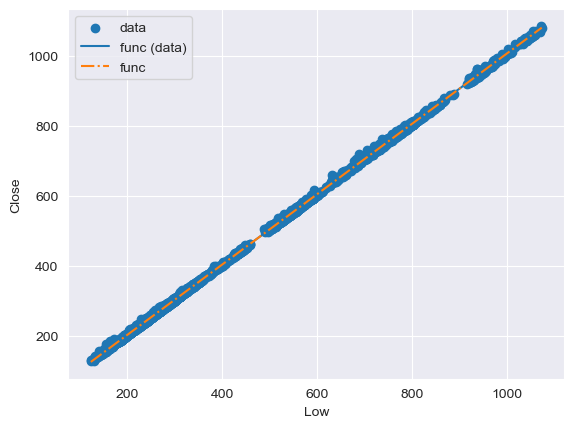

array([ 9.45921334e+06, -2.26027403e+04,  1.56506326e+01])


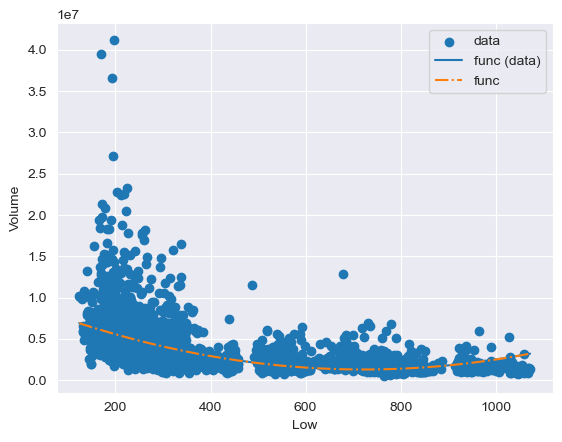

array([ 9.41692887e+06, -2.22010163e+04,  1.52161250e+01])


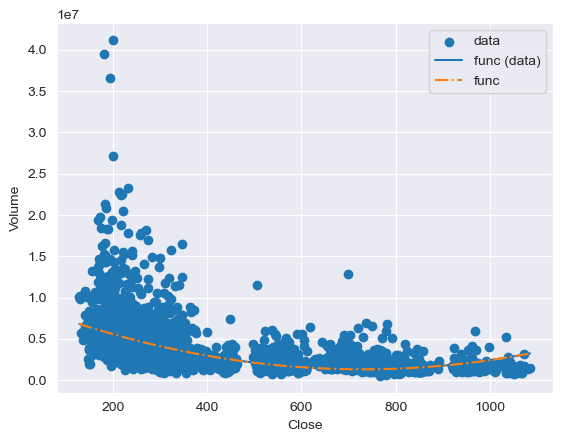

In [9]:
for i, mnk in enumerate(mnks):
    x_new = np.linspace(mnk.x.min(), mnk.x.max(), num=500,
                        endpoint=True)  # np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
    plt.scatter(mnk.x, mnk.y, label='data')
    plt.plot(np.sort(mnk.x), mnk.func(np.sort(mnk.x)), label='func (data)')
    plt.plot(x_new, mnk.func(x_new), '-.', label="func")
    plt.legend(loc='best')
    plt.xlabel(couples[i][0])
    plt.ylabel(couples[i][1])
    ax = plt.gca()
    # ax.set_xlim([0, 1])
    # ax.set_ylim([0, 1])
    pprint(mnk.c)
    plt.show()